## Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных 

#### Зимин Евгений Евгеньевич

Часть 1
1.	Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к
a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),
 б) равномерному.
2.	 Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
3.	Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

Часть 2

4.	Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).


### Решение:

#### Часть 1.

Сначала рассмотрим датасет, характеризующий распределение доли некурящих мужчин и женщин по регионам РФ. Ответим на вопрос, близко ли распределение к нормальному, насколько смещена медиана относительно среднего.

In [85]:
import urllib3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_excel_from_url(url):
    # Создаем объект urllib3.PoolManager()
    http = urllib3.PoolManager()

    # Отправляем GET-запрос для скачивания файла
    response = http.request('GET', url)

    # Сохраняем содержимое файла в байтах
    file_content = response.data

    # Создаем временный файл и записываем в него содержимое
    temp_file_path = 'temp.xlsx'  # Укажите путь для временного файла
    with open(temp_file_path, 'wb') as temp_file:
        temp_file.write(file_content)

    # Теперь можно прочитать временный файл с помощью pandas
    df = pd.read_excel(temp_file_path, engine='openpyxl')

    # Выводим данные
    # print(df)

    # Не забудьте закрыть временный файл после использования
    response.release_conn()

    return df

In [86]:
# Задаем URL для загрузки xlsx-файла
url = 'https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/files/31_2022_СЗН.xlsx' 

df = read_excel_from_url(url)

# возьмем мужчин и женщин городского и сельского населения
df = df.iloc[6:, :3].reset_index(drop=True)
df.columns = ['region', 'M', 'W']
df.head()

,region,M,W
0,Российская Федерация,62.572243,89.741035
1,Центральный федеральный округ,63.70667,89.548469
2,Белгородская область,62.499802,94.657346
3,Брянская область,59.684044,92.226723
4,Владимирская область,55.259673,90.977474


In [87]:
# Используем функцию melt() для объединения данных
melted_df = pd.melt(df, id_vars=['region'], var_name='sex', value_name='ratio')

# Заменяем названия столбцов
melted_df['sex'] = melted_df['sex'].str.replace('Доля курящих ', '')

# Выводим результат
print(melted_df)

                             region sex      ratio
0              Российская Федерация   M  62.572243
1    Центральный федеральный округ    M   63.70667
2              Белгородская область   M  62.499802
3                  Брянская область   M  59.684044
4              Владимирская область   M  55.259673
..                              ...  ..        ...
187                Амурская область   W  82.886214
188             Магаданская область   W  76.598124
189             Сахалинская область   W  75.065746
190          Еврейская авт. область   W  78.480791
191            Чукотский авт. округ   W  87.645595

[192 rows x 3 columns]


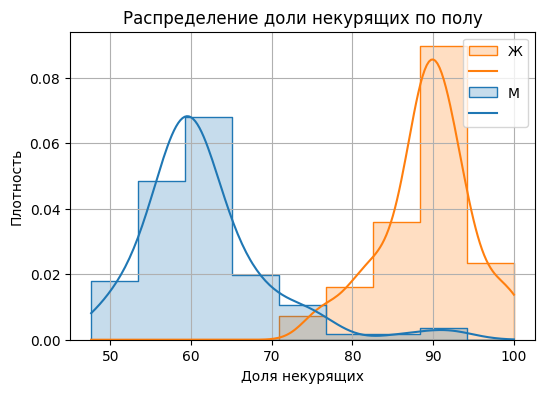

In [88]:
# Используем Seaborn для построения гистограммы
plt.figure(figsize=(6, 4))  # Размер графика
sns.histplot(data=melted_df, x='ratio', hue='sex', element='step', common_norm=False, stat='density', kde=True)
plt.xlabel('Доля некурящих')  # Подпись оси X
plt.ylabel('Плотность')  # Подпись оси Y
plt.title('Распределение доли некурящих по полу')  # Заголовок графика
# plt.legend(labels={'W':'Женщины', 'M':'Мужчины'})  # Легенда
plt.legend(labels=['Ж', '','М',''])
plt.grid(True)  # Сетка
plt.show()


Распределение доли некурящих женщин и мужчин по регионам в целом напоминает нормальное распределение, хотя и не очень хорошо ему соответствует. Длинные хвосты, несимметричность. Скорее, из-за того, что наблюдений не очень много.

In [24]:
range_M = df.M.max() - df.M.min()
abs(df.M.mean() - df.M.median()) < 0.15 * range_M

True

In [25]:
range_W = df.W.max() - df.W.min()
abs(df.W.mean() - df.W.median()) < 0.15 * range_W

True

Эти распределения не являются смещенными, то есть медиана от среднего отличается на менее, чем 15% размаха.

Поработаем с этими данными (касательно доли женщин) чуть побольше и ответим сразу на вопрос 3 части 1.

In [93]:
# описательные статистики
print(df.W.astype(float).describe())


count     96.000000
mean      89.158141
std        5.435205
min       75.065746
25%       86.849702
50%       89.597334
75%       92.236917
max      100.000000
Name: W, dtype: float64
0    100
Name: W, dtype: object


Средняя доля около 89.16%, а медиана 89.6%, то есть это пример несмещенного распределения. Моду для непрерывных величин считать нет смысла, поскольку каждое значение встречается один раз.

Теперь рассмотрим другой датасет, в котором распределение близко к равномерному. Это датасет "Наличие мест для занятий физической культурой и спортом".

In [80]:
# Задаем URL для загрузки xlsx-файла
url = 'https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/files/21_2022_СЗН.xlsx' 

df = read_excel_from_url(url)

# возьмем долю людей, отказавшихся от ответа на вопрос
df = df.iloc[6:, [0, 5, 6]].reset_index(drop=True)
df.columns = ['age', 'not_sure', 'reject_ratio']
df

,age,not_sure,reject_ratio
0,из них 15-17 лет,0.446715,0.138619
1,20-24 лет,0.888697,0.087228
2,25-29 лет,0.760095,0.020705
3,30-34 лет,0.852403,0.116839
4,35-39 лет,0.800234,0.101493
5,40-44 лет,0.839992,0.131917
6,45-49 лет,0.977646,0.115665
7,50-54 лет,0.917728,0.018069
8,55-59 лет,1.118247,0.09664
9,60-64 лет,1.312036,0.116141


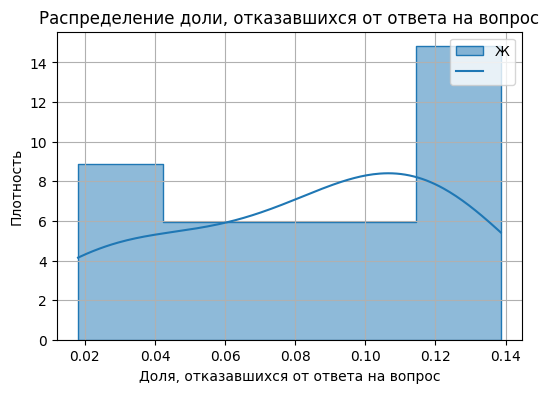

In [74]:
# Используем Seaborn для построения гистограммы
plt.figure(figsize=(6, 4))  # Размер графика
sns.histplot(data=df, x='reject_ratio', element='step', common_norm=False, stat='density', kde=True)
plt.xlabel('Доля, отказавшихся от ответа на вопрос')  # Подпись оси X
plt.ylabel('Плотность')  # Подпись оси Y
plt.title('Распределение доли, отказавшихся от ответа на вопрос')  # Заголовок графика
# plt.legend(labels={'W':'Женщины', 'M':'Мужчины'})  # Легенда
plt.legend(labels=['Ж', '','М',''])
plt.grid(True)  # Сетка
plt.show()


Это распределение уже более подходит на равномерное, хотя есть регионы, в которых доля отказов от ответа сильно выше, чем среднее, и регионы, где доля отказов сильно меньше.

In [57]:
range_M = df['reject_ratio'].max() - df['reject_ratio'].min()
print(abs(df['reject_ratio'].mean() - df['reject_ratio'].median()) < 0.15 * range_M)

True


Однако среднее и медиана смещены не на более 15% размаха. Теперь найдем распределение, в котором среднее и медиана отличается больше, чем на 15% размаха. Рассмотрим этот ж датасет, только возьмем теперь долю тех, кто затруднился ответить на вопрос.

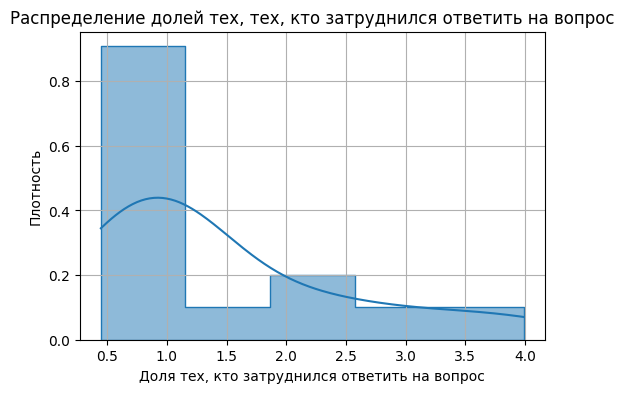

In [81]:
# Используем Seaborn для построения гистограммы
plt.figure(figsize=(6, 4))  # Размер графика
sns.histplot(data=df, x='not_sure', element='step', common_norm=False, stat='density', kde=True)
plt.xlabel('Доля тех, кто затруднился ответить на вопрос')  # Подпись оси X
plt.ylabel('Плотность')  # Подпись оси Y
plt.title('Распределение долей тех, тех, кто затруднился ответить на вопрос')  # Заголовок графика
plt.grid(True)  # Сетка
plt.show()


In [84]:
range_M = df['not_sure'].max() - df['not_sure'].min()
print(abs(df['not_sure'].mean() - df['not_sure'].median()) < 0.15 * range_M)
df['not_sure'].mean(), df['not_sure'].median()

False


(1.4791255127645246, 0.9476866140054805)

Это пример смещенного распределения.